<a href="https://colab.research.google.com/github/gabrielvinicios02/ExperimentsMultivariate/blob/f-DuasBases/ClassificadorXGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Temporais


<center>
<table><tr><td> <a href="http://www.minds.eng.ufmg.br/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/minds_logo_medium.jpeg" alt="MINDS - Machine Intelligence and Data Science Lab" width="100"/></a></td> 
  <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
<td><a href="https://pyfts.github.io/pyFTS/"><img src="https://github.com/petroniocandido/pyFTS/raw/master/img/logo_medium.png" alt="pyFTS - Fuzzy Time Series for Python" width="100"/></a></td>
</tr>
</table>
</center>

In [2]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS
#!pip3 install -U pyFTS
!pip3 install SimpSOM
!pip install dispy
#!pip install matplotlib==3.1.3

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-92z8ot7y
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-92z8ot7y
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pyFTS.models import hofts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

In [4]:
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets = {}

dff = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosFalha.xlsx')
dfn = pd.read_excel('../content/drive/MyDrive/DadosPWFTS/DadosNormais.xlsx')

dados_treino_Falha = dff[0:1200] 
dados_teste_Falha = dff[1200:1800]

dados_treino_Normal = dff[0:1200] 
dados_teste_Normal = dff[1200:1800]

In [5]:
print(dados_treino_Falha)

                    Data  LIT_2012KS_0251_FilteredSignal  \
0    2021-12-05 08:50:13                       35.298019   
1    2021-12-05 08:51:25                       69.698112   
2    2021-12-05 08:52:37                       86.492775   
3    2021-12-05 08:53:49                       87.605766   
4    2021-12-05 08:55:01                       87.592270   
...                  ...                             ...   
1195 2021-12-08 00:43:01                       50.016048   
1196 2021-12-08 00:44:13                       45.235531   
1197 2021-12-08 00:45:25                       40.457817   
1198 2021-12-08 00:46:37                       34.923355   
1199 2021-12-08 00:47:49                       27.762506   

      _AL_2012KS_06M1_SpeedActual  WIT_1085KS_2300_BeltLoad  \
0                        0.000000                604.000305   
1                        0.000000                594.372681   
2                        0.000000                548.985413   
3                        0.

In [6]:
print(dados_treino_Normal)

                    Data  LIT_2012KS_0251_FilteredSignal  \
0    2021-12-05 08:50:13                       35.298019   
1    2021-12-05 08:51:25                       69.698112   
2    2021-12-05 08:52:37                       86.492775   
3    2021-12-05 08:53:49                       87.605766   
4    2021-12-05 08:55:01                       87.592270   
...                  ...                             ...   
1195 2021-12-08 00:43:01                       50.016048   
1196 2021-12-08 00:44:13                       45.235531   
1197 2021-12-08 00:45:25                       40.457817   
1198 2021-12-08 00:46:37                       34.923355   
1199 2021-12-08 00:47:49                       27.762506   

      _AL_2012KS_06M1_SpeedActual  WIT_1085KS_2300_BeltLoad  \
0                        0.000000                604.000305   
1                        0.000000                594.372681   
2                        0.000000                548.985413   
3                        0.

In [7]:
print(dados_teste_Falha)

                    Data  LIT_2012KS_0251_FilteredSignal  \
1200 2021-12-08 00:49:01                       21.398041   
1201 2021-12-08 00:50:13                       16.841631   
1202 2021-12-08 00:51:25                       10.937268   
1203 2021-12-08 00:52:37                       12.856474   
1204 2021-12-08 00:53:49                       48.740646   
...                  ...                             ...   
1795 2021-12-08 22:26:13                       21.972658   
1796 2021-12-08 22:27:25                       16.798357   
1797 2021-12-08 22:28:37                        9.433760   
1798 2021-12-08 22:29:49                        5.125467   
1799 2021-12-08 22:31:01                       24.082239   

      _AL_2012KS_06M1_SpeedActual  WIT_1085KS_2300_BeltLoad  \
1200                    58.653568                730.848328   
1201                    58.494728                717.443176   
1202                    52.552979                749.952576   
1203                    23.

In [8]:
print(dados_teste_Normal)

                    Data  LIT_2012KS_0251_FilteredSignal  \
1200 2021-12-08 00:49:01                       21.398041   
1201 2021-12-08 00:50:13                       16.841631   
1202 2021-12-08 00:51:25                       10.937268   
1203 2021-12-08 00:52:37                       12.856474   
1204 2021-12-08 00:53:49                       48.740646   
...                  ...                             ...   
1795 2021-12-08 22:26:13                       21.972658   
1796 2021-12-08 22:27:25                       16.798357   
1797 2021-12-08 22:28:37                        9.433760   
1798 2021-12-08 22:29:49                        5.125467   
1799 2021-12-08 22:31:01                       24.082239   

      _AL_2012KS_06M1_SpeedActual  WIT_1085KS_2300_BeltLoad  \
1200                    58.653568                730.848328   
1201                    58.494728                717.443176   
1202                    52.552979                749.952576   
1203                    23.

## Analisando as Séries Temporais

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simpsom 2.0.1 requires matplotlib>=3.3.3, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


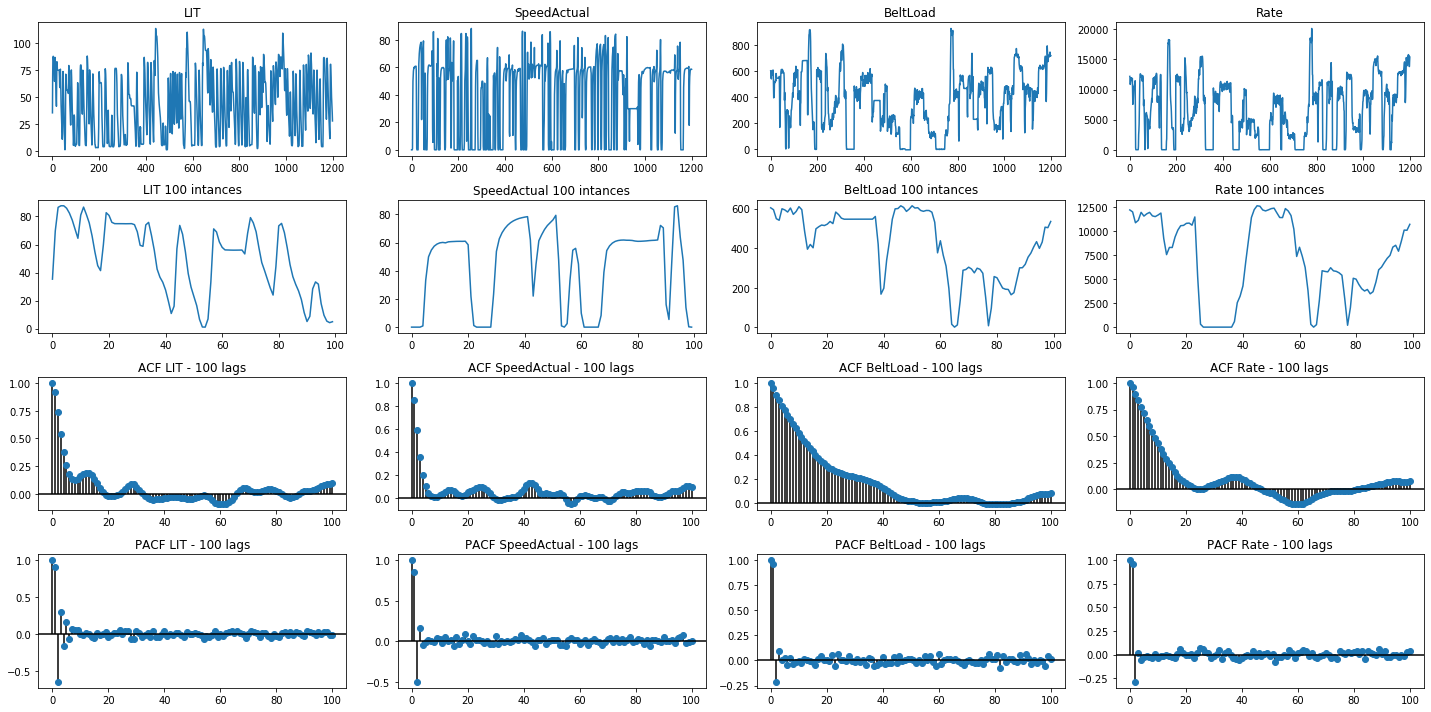

In [9]:
#Dados com Falhas
!pip install matplotlib==3.1.1

from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets1 = {}

datasets1['LIT'] = dados_treino_Falha.get('LIT_2012KS_0251_FilteredSignal')
datasets1['SpeedActual'] = dados_treino_Falha.get('_AL_2012KS_06M1_SpeedActual')
datasets1['BeltLoad'] = dados_treino_Falha.get('WIT_1085KS_2300_BeltLoad')
datasets1['Rate'] = dados_treino_Falha.get('WIT_1085KS_2300_Rate')


fig1, ax = plt.subplots(nrows=4, ncols=4, figsize=[20,10])

for ct, (key, data) in enumerate(datasets1.items()): 
  _lags = np.arange(0,101)
  _acf = acf(data,nlags=100)
  _pacf = pacf(data,nlags=100)
  
  ax[0][ct].set_title("{}".format(key))
  ax[0][ct].plot(data)
  
  ax[1][ct].set_title("{} 100 intances".format(key))
  ax[1][ct].plot(data[:100])
  
  ax[2][ct].set_title("ACF {} - 100 lags".format(key))
  ax[2][ct].plot(_lags, _acf, "o")
  ax[2][ct].vlines(_lags,[0],_acf)
  ax[2][ct].axhline(y=0, color='black')
  
  ax[3][ct].set_title("PACF {} - 100 lags".format(key))
  ax[3][ct].plot(_lags, _pacf, "o")
  ax[3][ct].vlines(_lags,[0],_pacf)
  ax[3][ct].axhline(y=0, color='black')

plt.tight_layout()

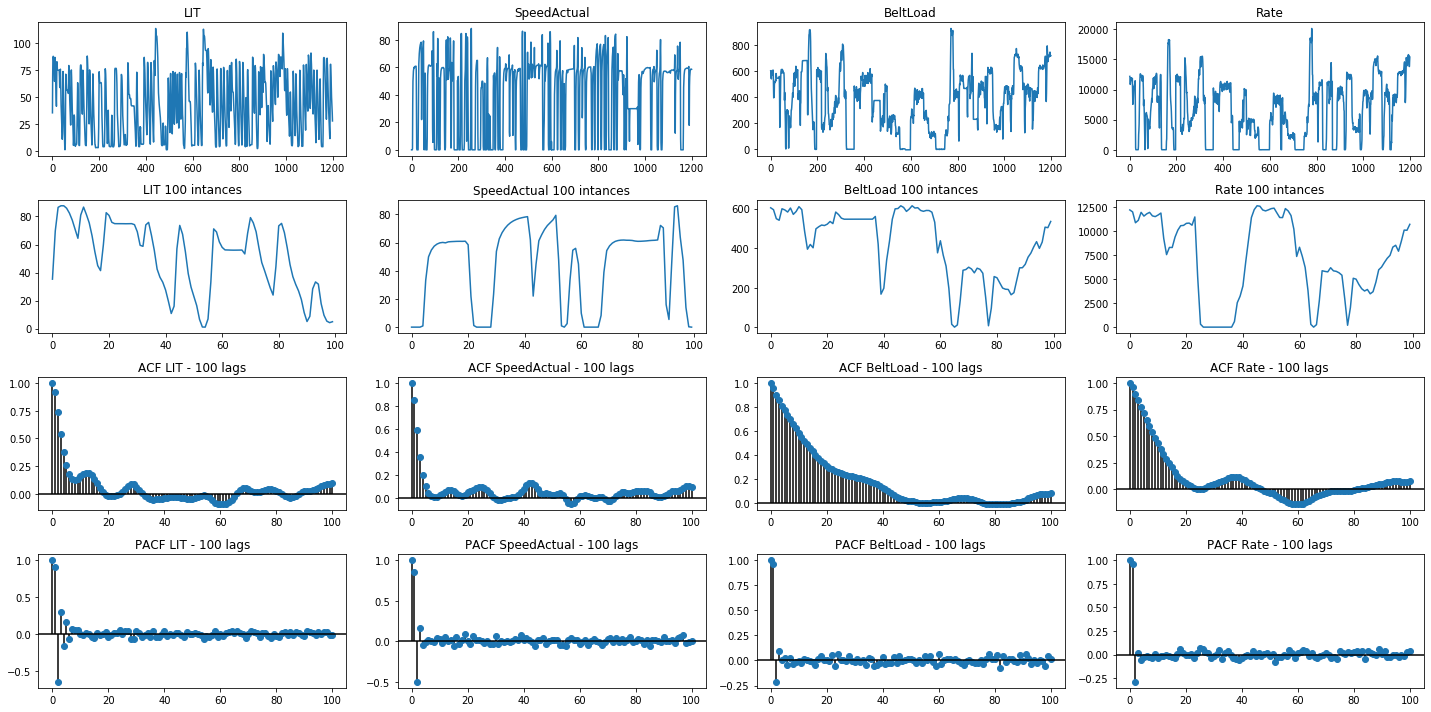

In [10]:
#Dados normais - sem falhas
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets2 = {}

datasets2['LIT'] = dados_treino_Normal.get('LIT_2012KS_0251_FilteredSignal')
datasets2['SpeedActual'] = dados_treino_Normal.get('_AL_2012KS_06M1_SpeedActual')
datasets2['BeltLoad'] = dados_treino_Normal.get('WIT_1085KS_2300_BeltLoad')
datasets2['Rate'] = dados_treino_Normal.get('WIT_1085KS_2300_Rate')


fig2, ax = plt.subplots(nrows=4, ncols=4, figsize=[20,10])

for ct, (key, data) in enumerate(datasets2.items()): 
  _lags = np.arange(0,101)
  _acf = acf(data,nlags=100)
  _pacf = pacf(data,nlags=100)
  
  ax[0][ct].set_title("{}".format(key))
  ax[0][ct].plot(data)
  
  ax[1][ct].set_title("{} 100 intances".format(key))
  ax[1][ct].plot(data[:100])
  
  ax[2][ct].set_title("ACF {} - 100 lags".format(key))
  ax[2][ct].plot(_lags, _acf, "o")
  ax[2][ct].vlines(_lags,[0],_acf)
  ax[2][ct].axhline(y=0, color='black')
  
  ax[3][ct].set_title("PACF {} - 100 lags".format(key))
  ax[3][ct].plot(_lags, _pacf, "o")
  ax[3][ct].vlines(_lags,[0],_pacf)
  ax[3][ct].axhline(y=0, color='black')

plt.tight_layout()

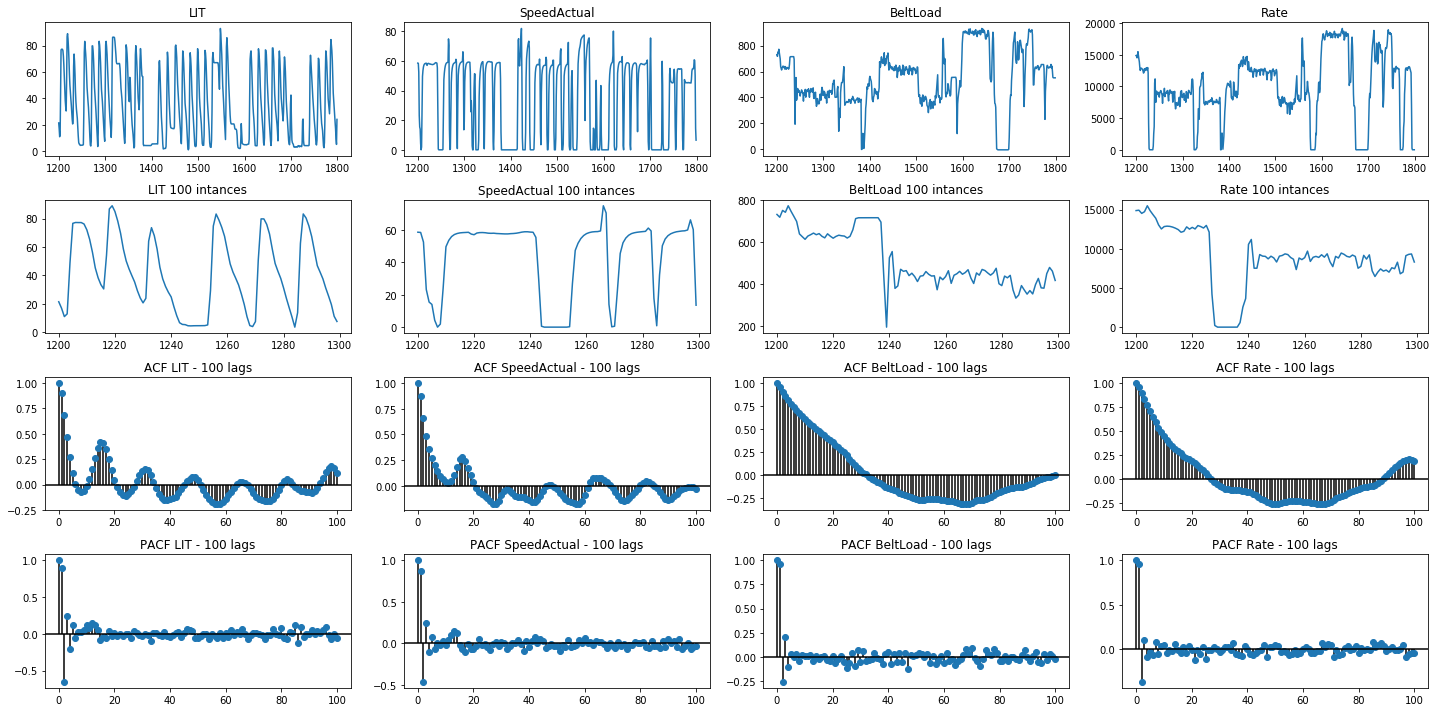

In [11]:
#Dados normais - sem falhas
from pyFTS.data import TAIEX, Malaysia, sunspots, artificial
from statsmodels.tsa.stattools import acf, pacf

datasets3 = {}

datasets3['LIT'] = dados_teste_Normal.get('LIT_2012KS_0251_FilteredSignal')
datasets3['SpeedActual'] = dados_teste_Normal.get('_AL_2012KS_06M1_SpeedActual')
datasets3['BeltLoad'] = dados_teste_Normal.get('WIT_1085KS_2300_BeltLoad')
datasets3['Rate'] = dados_teste_Normal.get('WIT_1085KS_2300_Rate')


fig3, ax = plt.subplots(nrows=4, ncols=4, figsize=[20,10])

for ct, (key, data) in enumerate(datasets3.items()): 
  _lags = np.arange(0,101)
  _acf = acf(data,nlags=100)
  _pacf = pacf(data,nlags=100)
  
  ax[0][ct].set_title("{}".format(key))
  ax[0][ct].plot(data)
  
  ax[1][ct].set_title("{} 100 intances".format(key))
  ax[1][ct].plot(data[:100])
  
  ax[2][ct].set_title("ACF {} - 100 lags".format(key))
  ax[2][ct].plot(_lags, _acf, "o")
  ax[2][ct].vlines(_lags,[0],_acf)
  ax[2][ct].axhline(y=0, color='black')
  
  ax[3][ct].set_title("PACF {} - 100 lags".format(key))
  ax[3][ct].plot(_lags, _pacf, "o")
  ax[3][ct].vlines(_lags,[0],_pacf)
  ax[3][ct].axhline(y=0, color='black')

plt.tight_layout()

,Partitions,RMSE,MAPE,U
0,Grid,14.01,inf,0.96
1,Entropy,28.34,inf,1.94
2,CMeans,10.47,inf,0.72


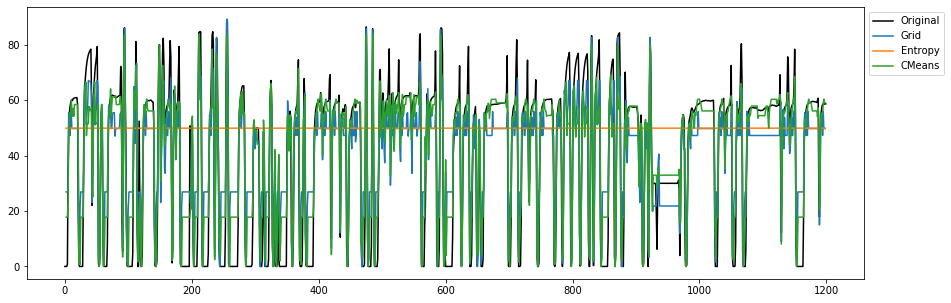

In [12]:
from pyFTS.models import hofts
from pyFTS.partitioners import Grid, FCM, CMeans, Entropy
from pyFTS.benchmarks import Measures

metodos = [Grid.GridPartitioner, Entropy.EntropyPartitioner, CMeans.CMeansPartitioner ]

k = 30

rows = []

y1=np.asarray(datasets1['SpeedActual'])

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(y1, label='Original',color='black')

for contador, metodo in enumerate(metodos):
  part = metodo(data=y1, npart=k)
  model = hofts.HighOrderFTS(order=2, partitioner=part)
  model.fit(y1)
  forecasts = model.predict(y1)
  for o in range(model.order):
    forecasts.insert(0,None)
    
  ax.plot(forecasts[:-1], label=part.name)
  
  rmse, mape, u = Measures.get_point_statistics(y1, model)
  
  rows.append([part.name, rmse, mape, u])
  

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

pd.DataFrame(rows, columns=['Partitions','RMSE','MAPE','U'])

In [14]:
from pyFTS.models import pwfts
#from pyFTS.models import chen, cheng, hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures
from pyFTS.common import Util

#metodos = [chen.ConventionalFTS, cheng.TrendWeightedFTS, hofts.HighOrderFTS, 
#          hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]
metodos = [pwfts.ProbabilisticWeightedFTS]

k = 10
y1 = datasets1['LIT']
tam_grupo = 100
i=0

for i in range(0,y1.size,tam_grupo):
  grpan = y1[i:i+tam_grupo]
  part = Grid.GridPartitioner(data=np.asarray(grpan), npart=k)
  for contador, metodo in enumerate(metodos):
    model1 = metodo(partitioner=part, progress=False, type='distribution')
    if model1.is_high_order:
      model1 = metodo(partitioner=part, order=1)
    model1.fit(np.asarray(y1))  
  print(model1)
  print(i)

Probabilistic FTS:
(0.112) A0 -> (0.529)A0, (0.376)A1, (0.056)A2, (0.024)A3, (0.013)A4, (0.001)A5
(0.133) A1 -> (0.371)A0, (0.389)A1, (0.098)A2, (0.046)A3, (0.029)A4, (0.035)A5, (0.025)A6, (0.007)A7
(0.085) A2 -> (0.039)A0, (0.399)A1, (0.279)A2, (0.066)A3, (0.065)A4, (0.064)A5, (0.057)A6, (0.03)A7, (0.002)A8
(0.094) A3 -> (0.0)A0, (0.05)A1, (0.398)A2, (0.332)A3, (0.067)A4, (0.032)A5, (0.045)A6, (0.048)A7, (0.027)A8, (0.001)A9
(0.107) A4 -> (0.001)A0, (0.005)A1, (0.038)A2, (0.39)A3, (0.332)A4, (0.084)A5, (0.042)A6, (0.065)A7, (0.038)A8, (0.004)A9
(0.094) A5 -> (0.002)A2, (0.075)A3, (0.441)A4, (0.245)A5, (0.042)A6, (0.062)A7, (0.109)A8, (0.025)A9
(0.091) A6 -> (0.0)A2, (0.002)A3, (0.134)A4, (0.405)A5, (0.213)A6, (0.092)A7, (0.127)A8, (0.028)A9
(0.106) A7 -> (0.001)A4, (0.113)A5, (0.397)A6, (0.283)A7, (0.138)A8, (0.067)A9
(0.109) A8 -> (0.001)A5, (0.083)A6, (0.411)A7, (0.421)A8, (0.084)A9
(0.069) A9 -> (0.037)A7, (0.313)A8, (0.65)A9

0
Probabilistic FTS:
(0.145) A0 -> (0.649)A0, (0.253)A1

In [13]:
from pyFTS.models import pwfts
#from pyFTS.models import chen, cheng, hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

#metodos = [chen.ConventionalFTS, cheng.TrendWeightedFTS, hofts.HighOrderFTS, 
#          hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]
metodos = [pwfts.ProbabilisticWeightedFTS]

k = 10
y2 = datasets1['SpeedActual']

part = Grid.GridPartitioner(data=np.asarray(y2), npart=k)

for contador, metodo in enumerate(metodos):
  model2 = metodo(partitioner=part, progress=False, type='distribution')
  if model2.is_high_order:
    model2 = metodo(partitioner=part, order=1)
  model2.fit(np.asarray(y2))
  print(model2)



Probabilistic FTS:
(0.233) A0 -> (0.802)A0, (0.075)A1, (0.05)A2, (0.036)A3, (0.021)A4, (0.011)A5, (0.004)A6, (0.001)A7
(0.044) A1 -> (0.499)A0, (0.022)A1, (0.041)A2, (0.076)A3, (0.195)A4, (0.103)A5, (0.05)A6, (0.014)A7
(0.025) A2 -> (0.284)A0, (0.07)A1, (0.018)A2, (0.044)A3, (0.16)A4, (0.333)A5, (0.051)A6, (0.011)A7, (0.018)A8, (0.012)A9
(0.052) A3 -> (0.106)A0, (0.059)A1, (0.036)A2, (0.527)A3, (0.06)A4, (0.137)A5, (0.055)A6, (0.011)A7, (0.009)A8, (0.001)A9
(0.033) A4 -> (0.142)A0, (0.124)A1, (0.007)A2, (0.08)A3, (0.046)A4, (0.327)A5, (0.216)A6, (0.026)A7, (0.023)A8, (0.01)A9
(0.102) A5 -> (0.033)A0, (0.063)A1, (0.031)A2, (0.013)A3, (0.039)A4, (0.3)A5, (0.471)A6, (0.033)A7, (0.008)A8, (0.008)A9
(0.362) A6 -> (0.005)A0, (0.019)A1, (0.006)A2, (0.007)A3, (0.009)A4, (0.077)A5, (0.732)A6, (0.117)A7, (0.02)A8, (0.007)A9
(0.082) A7 -> (0.007)A0, (0.043)A1, (0.034)A2, (0.022)A3, (0.02)A4, (0.06)A5, (0.301)A6, (0.281)A7, (0.198)A8, (0.033)A9
(0.05) A8 -> (0.006)A1, (0.017)A2, (0.059)A3, (0.026)

In [14]:
from pyFTS.models import pwfts
#from pyFTS.models import chen, cheng, hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

#metodos = [chen.ConventionalFTS, cheng.TrendWeightedFTS, hofts.HighOrderFTS, 
#          hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]
metodos = [pwfts.ProbabilisticWeightedFTS]

k = 10
y3 = datasets1['BeltLoad']

part = Grid.GridPartitioner(data=np.asarray(y3), npart=k)

for contador, metodo in enumerate(metodos):
  model3 = metodo(partitioner=part, progress=False, type='distribution')
  if model3.is_high_order:
    model3 = metodo(partitioner=part, order=1)
  model3.fit(np.asarray(y3))
  print(model3)

Probabilistic FTS:
(0.105) A0 -> (0.908)A0, (0.061)A1, (0.01)A2, (0.004)A3, (0.002)A4, (0.006)A5, (0.007)A6
(0.069) A1 -> (0.106)A0, (0.52)A1, (0.313)A2, (0.053)A3, (0.008)A4, (0.001)A5, (0.0)A6
(0.137) A2 -> (0.017)A0, (0.168)A1, (0.565)A2, (0.217)A3, (0.029)A4, (0.003)A5, (0.002)A6, (0.0)A7
(0.108) A3 -> (0.0)A0, (0.016)A1, (0.283)A2, (0.439)A3, (0.215)A4, (0.037)A5, (0.008)A6, (0.001)A7
(0.178) A4 -> (0.008)A1, (0.024)A2, (0.114)A3, (0.561)A4, (0.275)A5, (0.017)A6, (0.001)A7
(0.177) A5 -> (0.001)A1, (0.007)A2, (0.026)A3, (0.256)A4, (0.525)A5, (0.178)A6, (0.007)A7, (0.0)A8
(0.139) A6 -> (0.002)A1, (0.007)A2, (0.011)A3, (0.034)A4, (0.209)A5, (0.615)A6, (0.118)A7, (0.004)A8
(0.064) A7 -> (0.002)A2, (0.003)A3, (0.006)A4, (0.014)A5, (0.236)A6, (0.633)A7, (0.102)A8, (0.005)A9
(0.014) A8 -> (0.08)A6, (0.425)A7, (0.31)A8, (0.185)A9
(0.011) A9 -> (0.003)A6, (0.033)A7, (0.212)A8, (0.752)A9



In [15]:
from pyFTS.models import pwfts
#from pyFTS.models import chen, cheng, hofts, pwfts
from pyFTS.partitioners import Grid
from pyFTS.benchmarks import Measures

#metodos = [chen.ConventionalFTS, cheng.TrendWeightedFTS, hofts.HighOrderFTS, 
#          hofts.WeightedHighOrderFTS, pwfts.ProbabilisticWeightedFTS]
metodos = [pwfts.ProbabilisticWeightedFTS]

k = 10
y4 = datasets1['Rate']

part = Grid.GridPartitioner(data=np.asarray(y4), npart=k)

for contador, metodo in enumerate(metodos):
  model4 = metodo(partitioner=part, progress=False, type='distribution')
  if model4.is_high_order:
    model4 = metodo(partitioner=part, order=1)
  model4.fit(np.asarray(y4))
  print(model4)

Probabilistic FTS:
(0.212) A0 -> (0.92)A0, (0.052)A1, (0.013)A2, (0.005)A3, (0.004)A4, (0.005)A5, (0.001)A6
(0.094) A1 -> (0.118)A0, (0.554)A1, (0.275)A2, (0.046)A3, (0.007)A4, (0.0)A5, (0.0)A6
(0.132) A2 -> (0.028)A0, (0.184)A1, (0.582)A2, (0.178)A3, (0.023)A4, (0.002)A5, (0.003)A6
(0.092) A3 -> (0.012)A0, (0.036)A1, (0.25)A2, (0.349)A3, (0.322)A4, (0.028)A5, (0.003)A6
(0.184) A4 -> (0.001)A0, (0.014)A1, (0.011)A2, (0.15)A3, (0.624)A4, (0.187)A5, (0.013)A6, (0.0)A7
(0.148) A5 -> (0.005)A0, (0.004)A1, (0.008)A2, (0.022)A3, (0.21)A4, (0.56)A5, (0.184)A6, (0.007)A7
(0.089) A6 -> (0.001)A0, (0.003)A1, (0.003)A2, (0.004)A3, (0.042)A4, (0.289)A5, (0.522)A6, (0.131)A7, (0.005)A8
(0.035) A7 -> (0.003)A4, (0.02)A5, (0.312)A6, (0.624)A7, (0.037)A8, (0.003)A9
(0.012) A8 -> (0.005)A5, (0.039)A6, (0.067)A7, (0.711)A8, (0.178)A9
(0.003) A9 -> (0.183)A7, (0.529)A8, (0.287)A9



In [16]:
_, _, lhs1, rhs1 = pwfts.highorder_fuzzy_markov_chain(model1)

In [17]:
_, _, lhs2, rhs2 = pwfts.highorder_fuzzy_markov_chain(model2)

In [18]:
_, _, lhs3, rhs3 = pwfts.highorder_fuzzy_markov_chain(model3)

In [19]:
_, _, lhs4, rhs4 = pwfts.highorder_fuzzy_markov_chain(model4)

In [24]:
lhs1t = np.transpose(lhs1)
lhs2t = np.transpose(lhs2)
lhs3t = np.transpose(lhs3)
lhs4t = np.transpose(lhs4)

In [20]:
print("A priori")
print(lhs1)
print("A posteriori")
print(rhs1)

A priori
[0.13287447 0.14317929 0.11462559 0.13415415 0.11856347 0.12368006
 0.14423404 0.06170069 0.01666272 0.01032552]
A posteriori
[[5.83707487e-01 3.33191054e-01 5.50507501e-02 2.16163236e-02
  5.69697363e-03 7.37412221e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.62919209e-01 3.99028305e-01 8.95426067e-02 5.31148260e-02
  5.64771059e-02 3.67791450e-02 2.13880198e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.68892346e-02 3.35229128e-01 3.98556019e-01 1.01636499e-01
  5.68517633e-02 5.33272982e-02 2.60485988e-02 1.46145836e-03
  0.00000000e+00 0.00000000e+00]
 [2.01079902e-03 2.49579073e-02 3.34996116e-01 4.02948669e-01
  9.40944285e-02 6.93843832e-02 6.51412766e-02 6.46642018e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.68735265e-02 4.19682033e-01
  3.05989987e-01 7.00085652e-02 1.37152911e-01 3.02929775e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.22610344e-02
  3.86280972e-01 3

In [89]:
#Vetor supervisionado
ytst = np.zeros(11,)
ytst[1] = 1
ytst[2] = 1
ytst[3] = 1
ytst[4] = 1
ytst[5] = 1 

In [90]:
#Unir matriz com vetor
V1 = np.c_[rhs1,lhs1t]
V2 = np.c_[rhs2,lhs2t]
V3 = np.c_[rhs3,lhs3t]
V4 = np.c_[rhs4,lhs4t]

In [92]:
#Unir todas as matrizes geradas
BaseT = np.transpose(np.concatenate([V1,V2,V3,V4]))

In [93]:
BaseT2 = np.c_[BaseT,ytst]

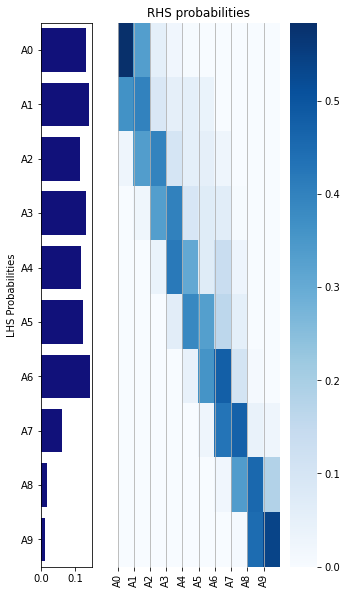

In [24]:
pwfts.visualize_distributions(model1)

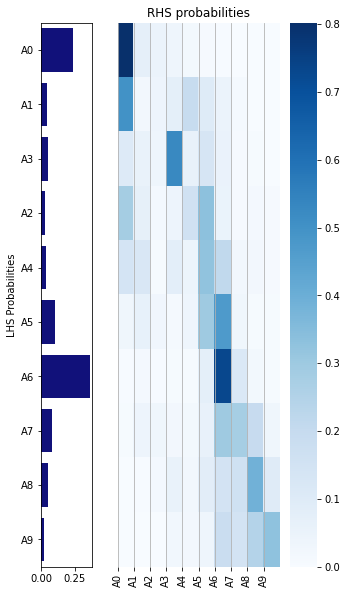

In [25]:
pwfts.visualize_distributions(model2)

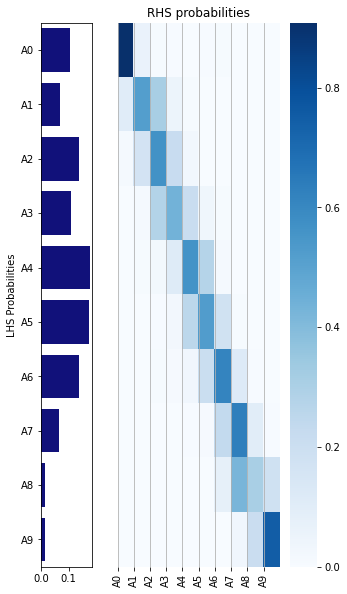

In [26]:
pwfts.visualize_distributions(model3)

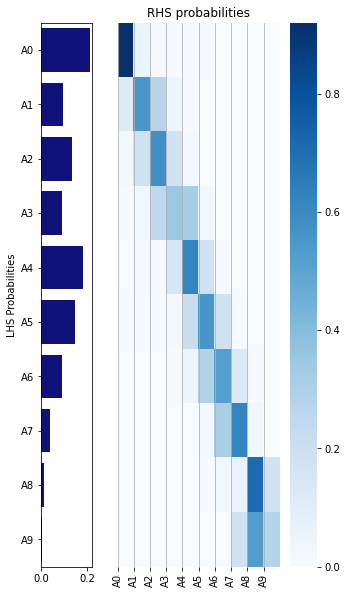

In [27]:
pwfts.visualize_distributions(model4)

In [94]:
#dataset = pd.read_excel('../content/sample_data/Base.xlsx')
#x = dataset.iloc[:,:-1].values
#y = dataset.iloc[:,-1].values
x = BaseT2[:,:-1]
y = BaseT2[:,-1]

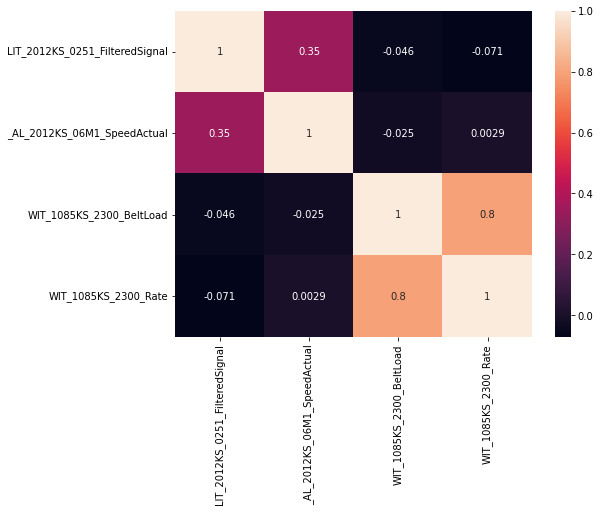

In [103]:
import seaborn as sns
#dataset2 = pd.read_excel('../content/sample_data/Base.xlsx')
corr_df = dff.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

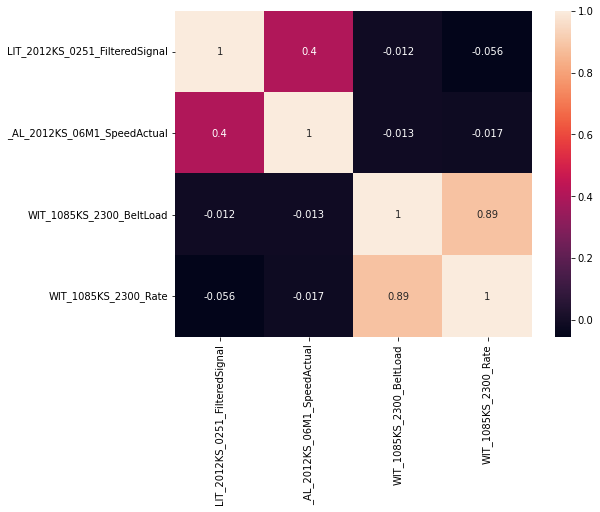

In [104]:
import seaborn as sns
#dataset2 = pd.read_excel('../content/sample_data/Base.xlsx')
corr_df = dfn.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 10)

In [97]:
from xgboost import XGBClassifier
Classifier = XGBClassifier()
Classifier.fit(x_train, y_train)

XGBClassifier()

Matriz de confusão

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
ypred = Classifier.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[2 0]
 [0 1]]


Precisão

In [99]:
accuracy_score(y_test, ypred)

1.0

In [101]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = 2)

print(accuracies.mean()*100)
print(accuracies.std()*100)

50.0
0.0
